In [1]:
import pandas as pd
import numpy as np
import zipfile
import re
from datetime import datetime

In [2]:
!pip3 install spacy

In [3]:
import pathlib
pathlib.Path().absolute()

PosixPath('/content')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science Lab/dataset_v2/libertarian_tweets_v1.csv', index_col=0)
dataset.head()
allText=[]
for tweet in dataset["text"]:
  allText.append(tweet)
print(allText)

['Join @RealSpikeCohen, educators, and parents on 7/30/20 in a virtual town hall hosted by @paceinfreedom. You can sign up to be a panelist or an observer as they discuss our failing education system. https://t.co/RauiqyKOdg \n\n#Education #VoteGold #VoteLibertarian https://t.co/pLWRR1bd0n', '@TN4Jorgensen @LPNational @LPArkansas @LPGeorgia @LPOhio Analyze mine!\n\nCheck out "Todd Hiett vs. Todd Hagopian"\n\nI would appreciate any tips you can offer!', 'Joe Biden has a terrible record on criminal justice reform and civil liberties.\n\nDonald Trump ha a terrible record on fiscal responsibility and free markets.\n\nAnd both are serial violators of women.\n\nThere is a better way, America. Join us, and #VoteGold for @Jorgensen4POTUS', 'MAGA email in my inbox this morning\n\nStay classy, @realDonaldTrump \n\nIm no Biden Fan, but at least Cardi B wasn’t performing golden showers for him https://t.co/Z84hHsiZMt', '@nsarwark Pack for the LPTexas executive leadership board meeting on the 7th i

In [6]:
dataset['word_count'] = dataset['text'].apply(lambda x: len(str(x).split(" ")))
dataset[['text','word_count']].head()
dataset.word_count.describe()

count    76.000000
mean     24.197368
std      14.973772
min       2.000000
25%      12.250000
50%      23.000000
75%      38.000000
max      53.000000
Name: word_count, dtype: float64

In [7]:
freq = pd.Series(' '.join(dataset['text']).split()).value_counts()[:20]
freq

the                 85
to                  54
and                 37
of                  30
in                  28
a                   27
for                 22
is                  19
you                 18
RT                  18
@Jorgensen4POTUS    16
on                  15
are                 15
that                15
&amp;               12
@RealSpikeCohen     12
@LPNational         12
debate              11
or                  10
be                  10
dtype: int64

In [8]:
import nltk
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely


In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["RT","SCREEN_NAME", "rt", "http", "https", "co", 'amp', 'potus', 'lpmisescaucus', 'lpnational', 'towards', 'describes', 'votegold', 'thank', 'whereisspike'] 
stop_words = stop_words.union(new_words)

In [54]:
corpus1 = []
for tweet in dataset['text']:
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', tweet)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus1.append(text)

In [55]:
corpus = []
for text in corpus1:
  new_text = text.replace('realdonaldtrump', 'trump')
  final = new_text.replace('joebiden', 'biden')
  final = final.replace('coronavirus', 'COVID')
  final = final.replace('corona', 'COVID')
  final = final.replace('president donald trump', 'trump')
  final = final.replace('president donald j trump', 'trump')
  final = final.replace('realspikecohen', 'spike cohen')
  final = final.replace('jorgensen', 'jo jorgensen')
  final = final.replace('vpdebate', 'vp debate')
  # final = final.replace('green new deal', 'gnd')
  # final = final.replace('greennewdeal', 'gnd')
  # final = final.replace('hoffman', 'madelynhoffman')
  # final = final.replace('voter', 'vote')
  # final = final.replace(' hawkins', ' howiehawkins')
  corpus.append(final)

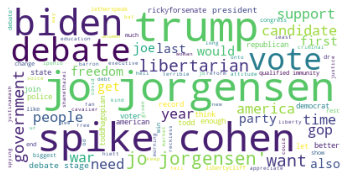

In [56]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)
list(cv.vocabulary_.keys())[:10]

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['screen_name'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


['join',
 'spike',
 'cohen',
 'educator',
 'parent',
 'virtual',
 'town',
 'hall',
 'hosted',
 'paceinfreedom']

[Text(0, 0, 'jo'),
 Text(0, 0, 'jorgensen'),
 Text(0, 0, 'trump'),
 Text(0, 0, 'debate'),
 Text(0, 0, 'spike'),
 Text(0, 0, 'cohen'),
 Text(0, 0, 'biden'),
 Text(0, 0, 'vote'),
 Text(0, 0, 'want'),
 Text(0, 0, 'libertarian'),
 Text(0, 0, 'government'),
 Text(0, 0, 'candidate'),
 Text(0, 0, 'america'),
 Text(0, 0, 'support'),
 Text(0, 0, 'year'),
 Text(0, 0, 'war'),
 Text(0, 0, 'time'),
 Text(0, 0, 'get'),
 Text(0, 0, 'need'),
 Text(0, 0, 'people')]

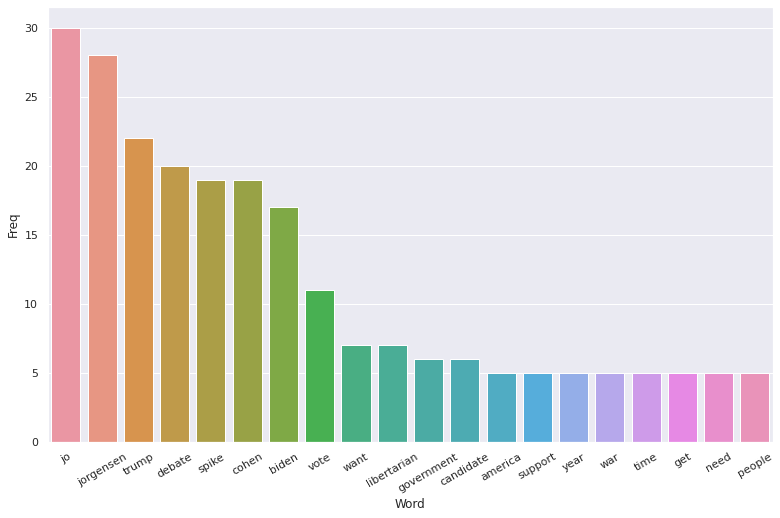

In [58]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                Bi-gram  Freq
0          jo jorgensen    28
1           spike cohen    19
2             joe biden     4
3       jorgensen spike     4
4          debate stage     4
5    qualified immunity     3
6           gop support     3
7            todd hiett     2
8       terrible record     2
9      criminal justice     2
10       justice reform     2
11          free market     2
12    reckless cavalier     2
13       cavalier trump     2
14           cohen onto     2
15  republican democrat     2
16            vp debate     2
17          biden trump     2
18                dr jo     2
19        end qualified     2


[Text(0, 0, 'jo jorgensen'),
 Text(0, 0, 'spike cohen'),
 Text(0, 0, 'joe biden'),
 Text(0, 0, 'jorgensen spike'),
 Text(0, 0, 'debate stage'),
 Text(0, 0, 'qualified immunity'),
 Text(0, 0, 'gop support'),
 Text(0, 0, 'todd hiett'),
 Text(0, 0, 'terrible record'),
 Text(0, 0, 'criminal justice'),
 Text(0, 0, 'justice reform'),
 Text(0, 0, 'free market'),
 Text(0, 0, 'reckless cavalier'),
 Text(0, 0, 'cavalier trump'),
 Text(0, 0, 'cohen onto'),
 Text(0, 0, 'republican democrat'),
 Text(0, 0, 'vp debate'),
 Text(0, 0, 'biden trump'),
 Text(0, 0, 'dr jo'),
 Text(0, 0, 'end qualified')]

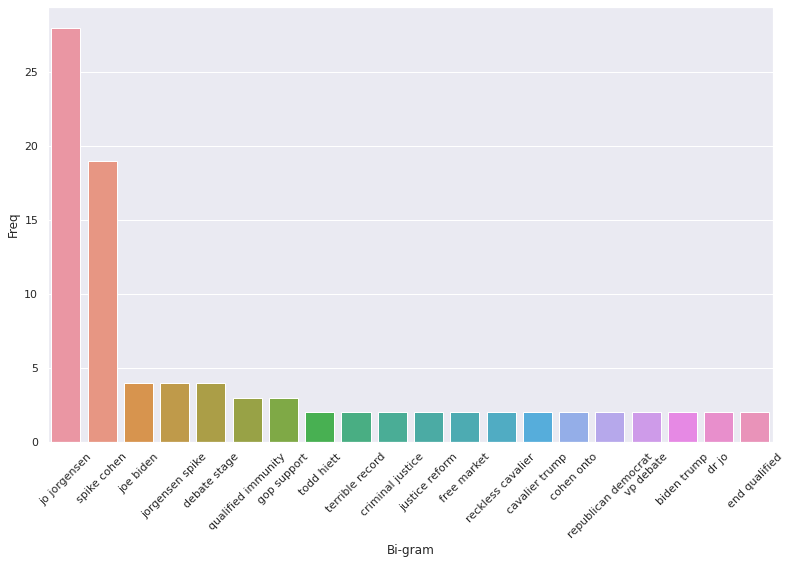

In [59]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
# doc=corpus[532]
doc=""
for line in corpus:
  doc= doc + str(line)
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,30)
# now print the results
print("\nText:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Text:
angelanwalker ranklisafirst abyosnb gmeow pls attn wisconsin hawkins valid write candidate let democrat discouragefake debate failed democracymarknorberg greenpartyofnj trump flotus gop dnc howiehawkins angelanwalker throhowiehawkins want medicareforall one candidate vote fall major campaign ballotone two elected green new jersey jessicaclayton board education brick nj speaking live woman madelynhoffman u drjillstein lisaformaine angelanwalker francamullerpaz live facebook twitter rocklove see real crime however whitesupremacy cloaked authoritarian fascism gop trump lot dnc complicity rp btfifriday need help keep growing people powered campaign donate today dek p mxgy hcgulawbttheredshift mathemattic ttaesarang gcramer gdpr sherryb marrziem dragonxcore moron theworld pammyjill marvinis theppl mikevictor montanasociali ppo fund ladyreverbs jaytingwalker ghostlyjorg votegarret comradelegolas savoltolin johnstalv lynninchicago congresskate hregorg nicolenonya fuksoks sjprogressive 